 # Least Squares 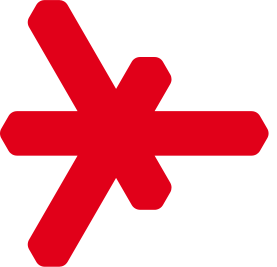
In diesem Notebook werden wir lineare Regression (least squares) implementieren und auf die Auto-Daten anwenden, um Gebrauchtwagenpreise auf EBay vorherzusagen.

## 1. Implementierung

Implementieren Sie eine Methode *leastsquares()*, die gemäß der Formel aus der Vorlesung die Parameter $(a,b)$ einer Ausgleichsgerade ermittelt und zurückliefert.
Ihre Methode erhält mit x und y zwei Numpy-Arrays der Länge $n$ mit den x- und y-Koordinaten der gegebenen Stichprobe.

*Hinweis: Sie benötigen Kennwerte wie Mittelwert oder Varianz. Verwenden Sie hierzu numpy-Methoden wie mean() und var().*


In [1]:
import numpy as np

def leastsquares(x,y):
    sxx = np.var(x)
    sxy = np.sum(x*y)/len(x) - (np.mean(x)*np.mean(y))
    a = sxy/sxx
    b = np.mean(y) - a* np.mean(x)
    return a,b


## 2. Kleiner Test
Wir verwenden zunächst eine kleine Stichprobe: 
$$(x_1,y_1), ..., (x_4,y_4) = (1,1), (2,2), (3,5), (4,7).
$$
Testen Sie Ihre Methode *leastsquares()*, indem Sie sie auf die Daten anwenden und dann Daten und Gerade mit der Funktion *plot()* plotten.

In [2]:
import matplotlib.pyplot as plt

def plot(x, y, a, b):
    """ 
          ! DO NOT TOUCH !

          This method plots the 2D point cloud (x,y) in red, 
          and the fitted line (a,b) in orange.
    """
    plt.plot(x, y, 'o', color='red', markersize=5)
    xmin = np.min(x)-1
    xmax = np.max(x)+1
    ymin = np.min(y)-1
    ymax = np.max(y)+1    
    plt.axis([xmin,xmax,ymin,ymax]) # set range to plot
    xticks = np.arange(xmin, xmax, (xmax-xmin)/1000.)
    plt.plot(xticks, a*xticks+b, '-', color='orange')
    
    plt.grid(True)
    plt.show()    
    
x = np.array([1,2,3,4])
y = np.array([1,2,5,7])
a,b = leastsquares(x,y)
print(a, b)
plot(x,y,a,b)

2.1 -1.5


<Figure size 640x480 with 1 Axes>

## 3. Autodaten laden
Laden Sie die bekannten Autodaten 'cars.csv'. Führen Sie hierzu die nächste Zelle aus *(es ist keine Änderung am Code nötig!)*.

In [3]:
import pandas

cars = pandas.read_csv('cars.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = cars.columns
for i,col in enumerate(columns):
    print('%.2d : %s' %(i,col))
    
# Wir konvertieren die Daten in ein Numpy-Array.
data = cars.values.astype('float')

# Wir filtern alle Autos die teurer als 50.000 EUR sind.
data = data[data[:,0]<50000,:]
# Wir filtern alle Autos die billiger als 1.000 EUR sind.
data = data[data[:,0]>=1000,:]

00 : dollar_price
01 : registration_year
02 : power_ps
03 : kilometer
04 : postal_code
05 : type__bus
06 : type__cabrio
07 : type__coupe
08 : type__kleinwagen
09 : type__kombi
10 : type__limousine
11 : type__suv
12 : gearbox__automatik
13 : gearbox__manuell
14 : fuel__benzin
15 : fuel__diesel
16 : brand__alfa_romeo
17 : brand__audi
18 : brand__bmw
19 : brand__chevrolet
20 : brand__chrysler
21 : brand__citroen
22 : brand__dacia
23 : brand__daewoo
24 : brand__daihatsu
25 : brand__fiat
26 : brand__ford
27 : brand__honda
28 : brand__hyundai
29 : brand__jaguar
30 : brand__jeep
31 : brand__kia
32 : brand__lada
33 : brand__lancia
34 : brand__land_rover
35 : brand__mazda
36 : brand__mercedes_benz
37 : brand__mini
38 : brand__mitsubishi
39 : brand__nissan
40 : brand__opel
41 : brand__peugeot
42 : brand__porsche
43 : brand__renault
44 : brand__rover
45 : brand__saab
46 : brand__seat
47 : brand__skoda
48 : brand__smart
49 : brand__subaru
50 : brand__suzuki
51 : brand__toyota
52 : brand__trabant
5

## 4. Autopreise vorhersagen
Verwenden Sie nun Ihr Least-Squares-Modell, um den *Preis* eines Autos vorherzusagen, gegeben den *Kilometerstand*. 
* Extrahieren Sie hierzu beide Spalten aus der Matrix *data* und rufen Sie leastsquares() auf, um die Parameter $a$ und $b$ zu bestimmen.
* Ermitteln Sie dann für die ersten zehn Autos die Vorhersage Ihres Modells und vergleichen Sie sie mit den echten Preisen.

Wirken die Ergebnisse (halbwegs) plausibel?

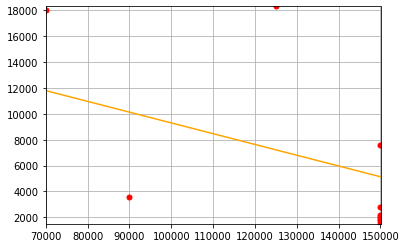

-0.08322807743761794 17618.19358462254
i	y	fy
0	18300	7214
1	1500	5133
2	3600	10127
3	2200	5133
4	2000	5133
5	2799	5133
6	17999	11792
7	1750	5133
8	7550	5133
9	1850	5133


In [4]:
prices = data[:,0]
km = data[:,3]
a,b = leastsquares(km,prices)

depth = 10
x = km[:depth]
y = prices[:depth]
plot(x,y,a,b)

print(a,b)
print("i\ty\tfy")
for i in range(len(x)):
    print("%d\t%d\t%d"%(i,y[i],a*x[i]+b))

#Ja sie wirken plausibel, da die Gerade probiert die Abstände zu den Wert

## 5. Modell bewerten
Schreiben Sie eine Funktion *error()*, die ermittelt um *wieviel Prozent* der echte Preis vom vorhergesagten Preis abweicht - gemittelt über alle Autos.
Ihre Funktion erhält als Parameter die prognostizierten Preise und die echten Preise. 
Rufen Sie error() für Ihr Modell auf. Um wieviel Prozent weicht die kilometerstandsbasierte Prognose im Schnitt vom echten Preis ab?

In [5]:
yp = a * x + b

def error(ypredicted, yreal):
    dy = 0
    for i in range(len(yreal)):
        dy += abs(ypredicted[i]-yreal[i])/ypredicted[i]
        #print(abs(ypredicted[i]-yreal[i])/ypredicted[i])
    return dy/len(yreal)

print(error(yp,y))
#Die Prognose weicht zu 68,21% ab

0.6821319132787202


## 6. Merkmale vergleichen
Versuchen Sie nun, den Preis nicht nur anhand des Kilometerstandes vorherzusagen, sondern versuchen Sie es mit *jedem* Merkmal (dem Zulassungsjahr, den PS, dem Kilometerstand, etc.). Für jedes Merkmal:
* Bestimmen Sie die Parameter a,b, mit leastsquares()
* Ermitteln Sie die vorhergesagten Preise
* Geben Sie den prozentualen Fehler aus, mit error().

Welches Merkmal ist das beste?

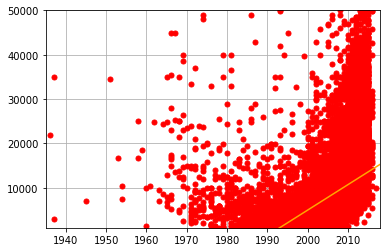

registration_year 0.377267726901226


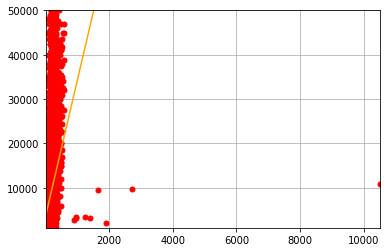

power_ps 0.6048837756311121


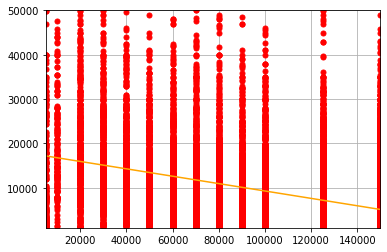

kilometer 0.6317472306542562


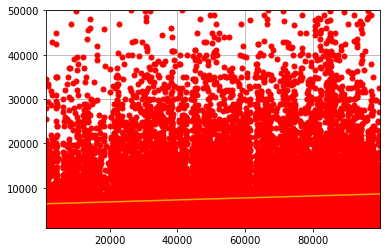

postal_code 0.7040708349615564


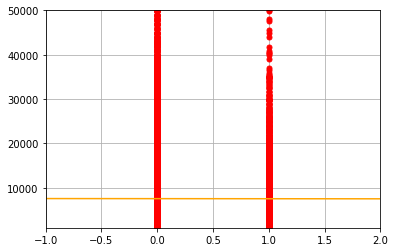

type__bus 0.706970940138019


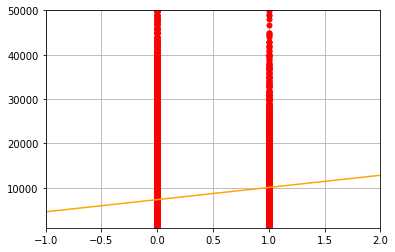

type__cabrio 0.7046208976838153


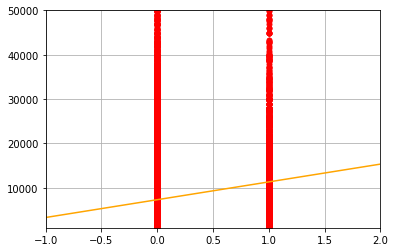

type__coupe 0.7002552924297465


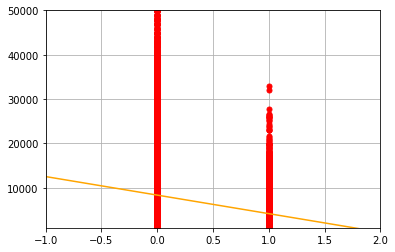

type__kleinwagen 0.6749324838913


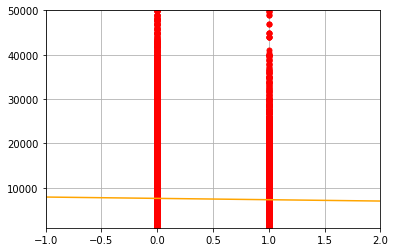

type__kombi 0.7070006798515838


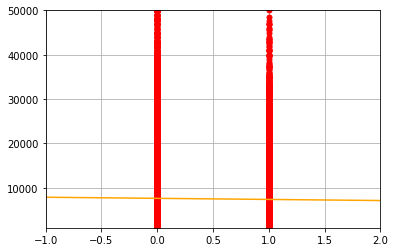

type__limousine 0.7070739995134768


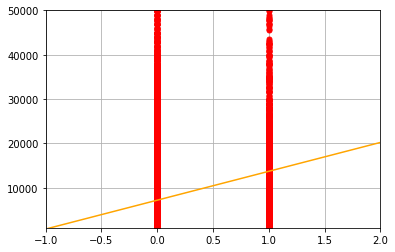

type__suv 0.6955140417642222


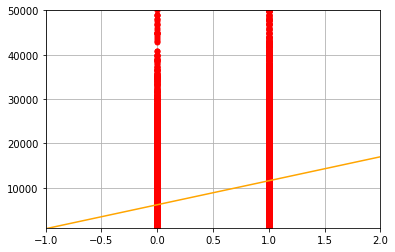

gearbox__automatik 0.6680602755378298


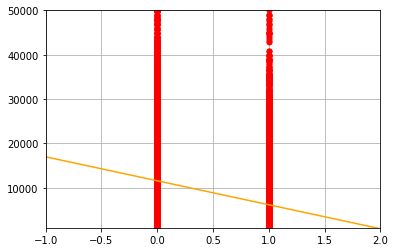

gearbox__manuell 0.6680602755378298


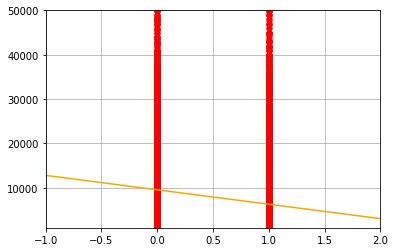

fuel__benzin 0.6914139436533001


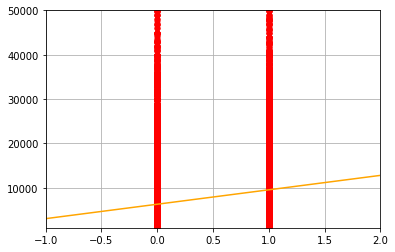

fuel__diesel 0.6914139436533004


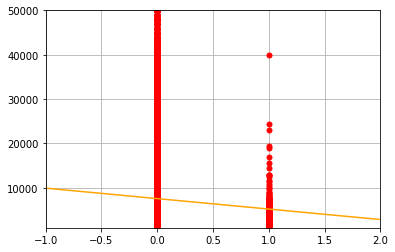

brand__alfa_romeo 0.7065389877372305


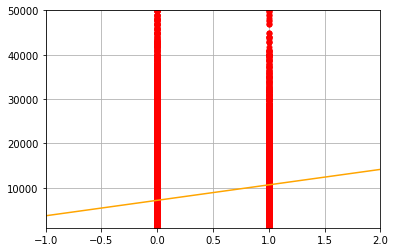

brand__audi 0.6989149020302894


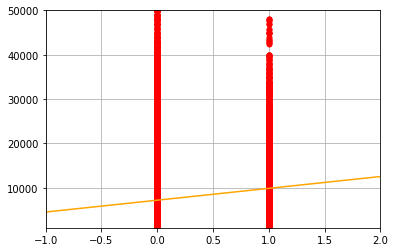

brand__bmw 0.7015543772006695


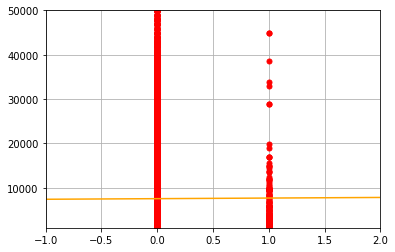

brand__chevrolet 0.7069899211724856


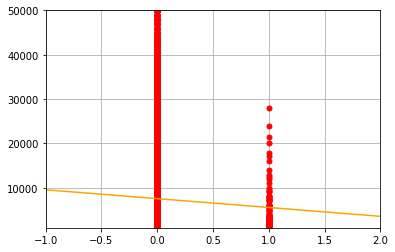

brand__chrysler 0.7068629733786642


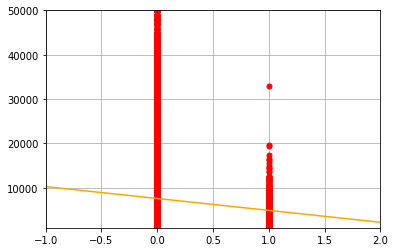

brand__citroen 0.7056913293660142


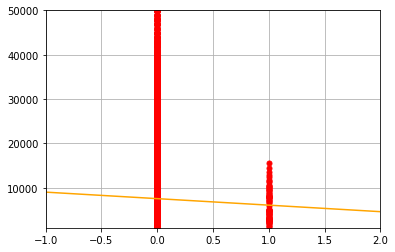

brand__dacia 0.7069476722490401


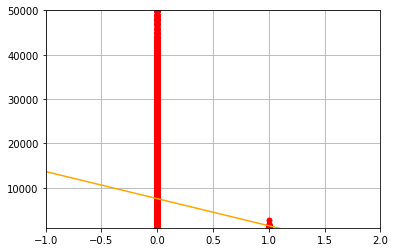

brand__daewoo 0.7063110203566388


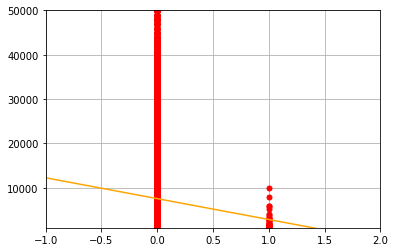

brand__daihatsu 0.7065729356843612


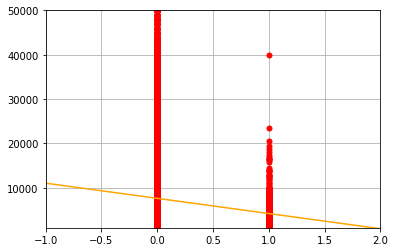

brand__fiat 0.7038449439725688


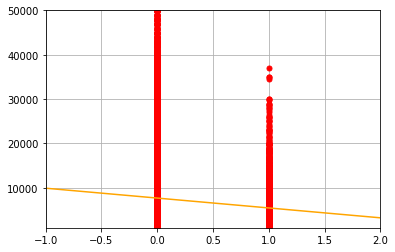

brand__ford 0.7046648350830843


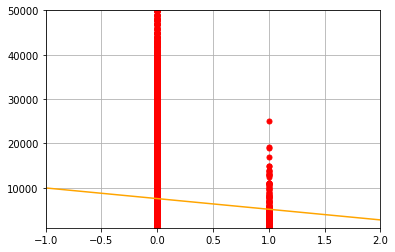

brand__honda 0.7065692733576205


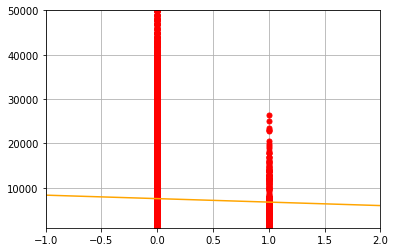

brand__hyundai 0.7068340877946363


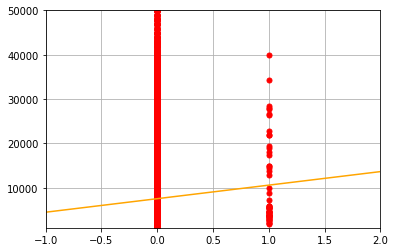

brand__jaguar 0.7069134710310165


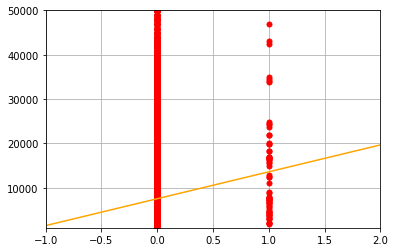

brand__jeep 0.7066109112180764


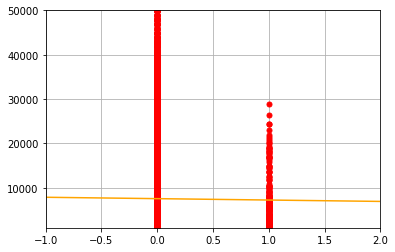

brand__kia 0.7069776830267979


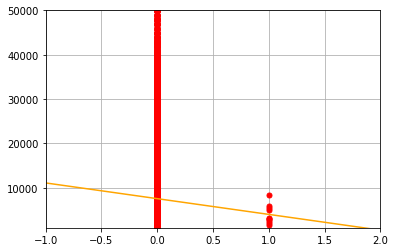

brand__lada 0.7069035017095271


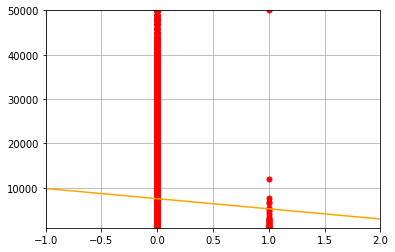

brand__lancia 0.706924195264751


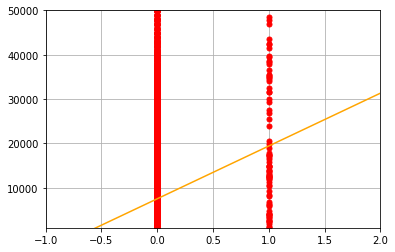

brand__land_rover 0.7053770009610104


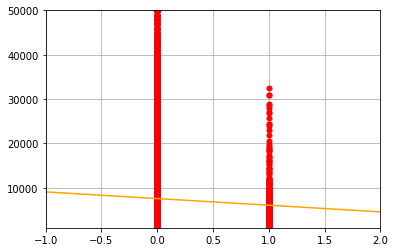

brand__mazda 0.706488689009438


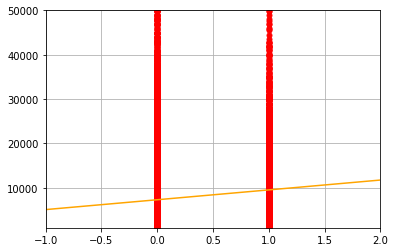

brand__mercedes_benz 0.7041354791615088


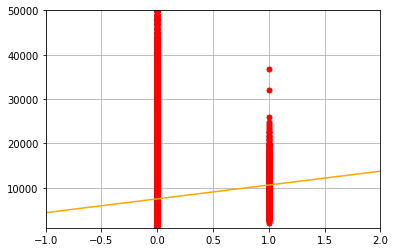

brand__mini 0.7065022329437255


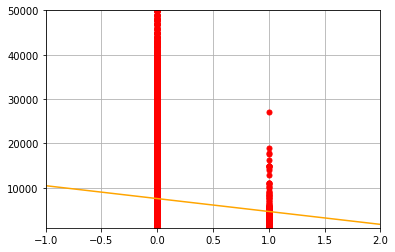

brand__mitsubishi 0.7062369108612929


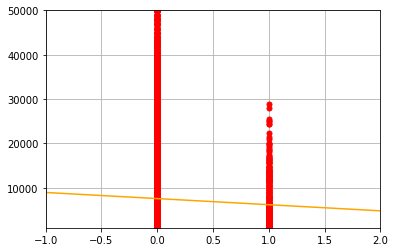

brand__nissan 0.706997454911255


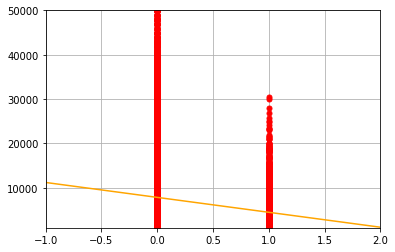

brand__opel 0.6962385045853243


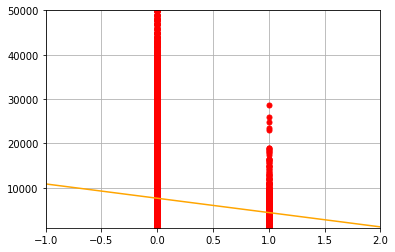

brand__peugeot 0.701976555730592


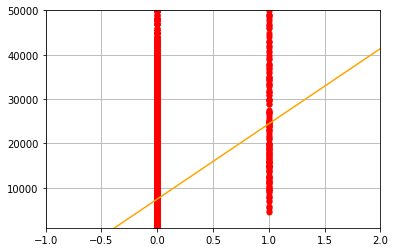

brand__porsche 0.7010299885060259


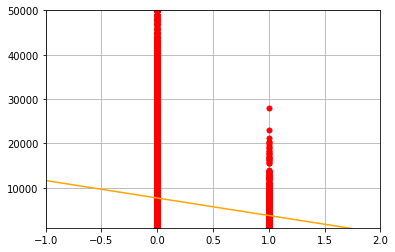

brand__renault 0.6993028874952391


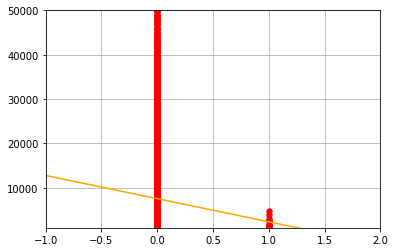

brand__rover 0.7065862766130037


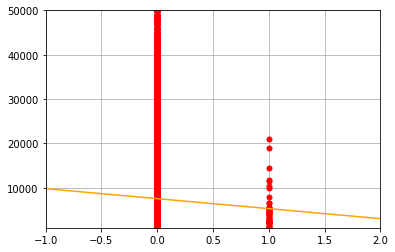

brand__saab 0.7068339534179311


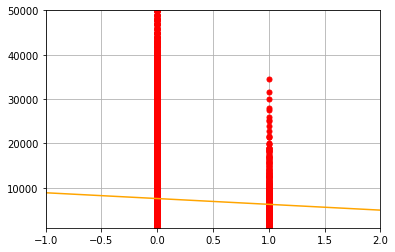

brand__seat 0.7066768835914392


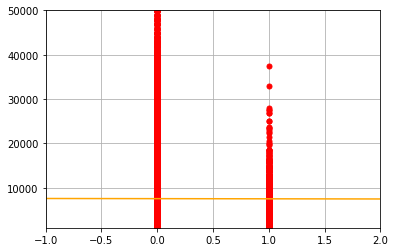

brand__skoda 0.706981895394319


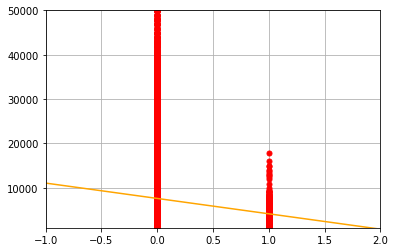

brand__smart 0.703827757034926


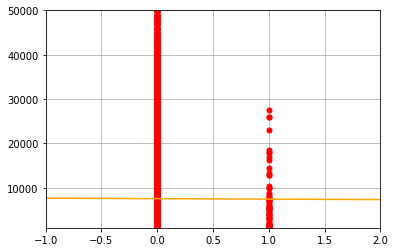

brand__subaru 0.7069881899138196


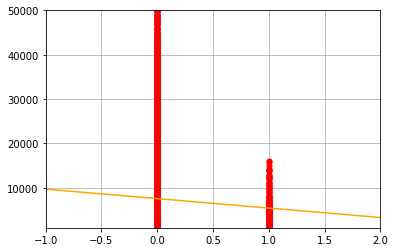

brand__suzuki 0.7064480190966872


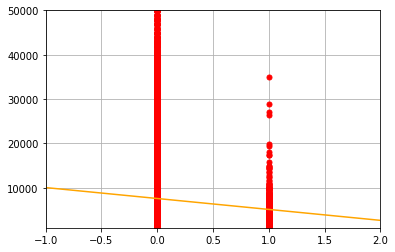

brand__toyota 0.7052093471595285


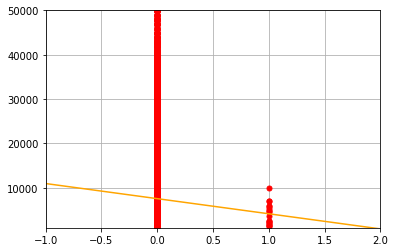

brand__trabant 0.7068764952146206


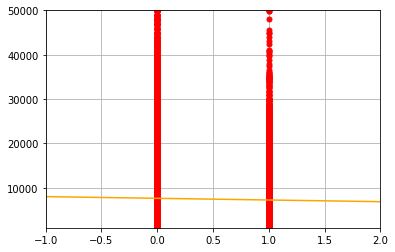

brand__volkswagen 0.7069791155120165


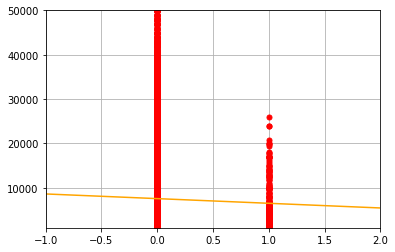

brand__volvo 0.7069373539772156


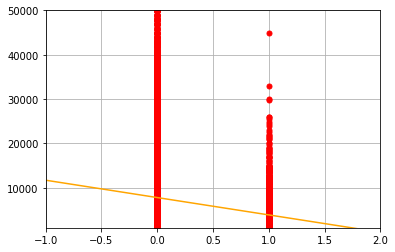

damage__ja 0.6961997495264998


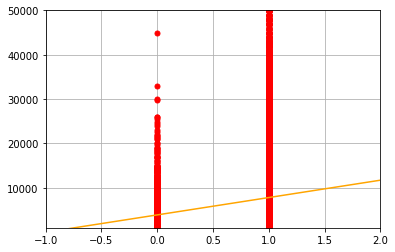

damage__nein 0.6961997495265001


In [6]:
#prices = data[:,0]

#errors = np.empty([len(columns-1),1], dtype = float)
for i in range(1,len(columns)):
    x = data[:,i]
    a,b = leastsquares(x,prices)
    plot(x,prices,a,b) 
    ypredicted = a * x + b
    print(columns[i],error(ypredicted,prices))
    
# Das beste Merkmal ist das Zulassungsjahr mit einer Abweichung von 37,73%